In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("tweet_data3.csv")

In [4]:
df

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median
0,ディーふらぐ!,2014-01-11,14,59.928571,50.5,52,52.615385,30.0,NaN,NaN,NaN
1,うちの師匠はしっぽがない,2022-11-09,12,219.916667,178.0,30,341.133333,277.5,22.0,1448.409091,268.5
2,日常,2011-04-17,13,20.615385,18.0,1,4.000000,4.0,NaN,NaN,NaN
3,戦国BASARA,2011-04-14,54,21.814815,16.0,12,19.166667,19.0,NaN,NaN,NaN
4,スロウスタート,2017-08-09,1,520.000000,520.0,4,2429.750000,2266.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
702,夜は猫といっしょ,2022-06-29,6,5198.333333,3230.5,29,6673.000000,3555.0,NaN,NaN,NaN
703,魔法陣グルグル,2022-10-13,10,371.800000,233.0,10,310.200000,200.0,NaN,NaN,NaN
704,究極進化したフルダイブRPGが現実よりもクソゲーだったら,2021-03-26,15,133.000000,121.0,63,356.031746,123.0,NaN,NaN,NaN
705,ジャヒー様はくじけない!,2021-08-01,5,1622.600000,1553.0,41,1459.073171,647.0,NaN,NaN,NaN


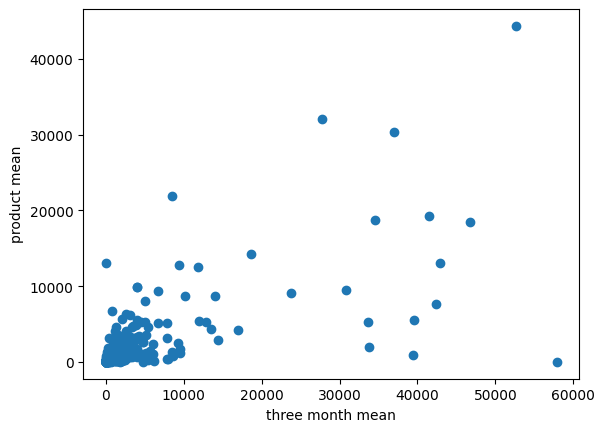

In [6]:
x = df['three_month_mean']
y = df['product_mean']
plt.scatter(x,y)

plt.xlabel('three month mean')
plt.ylabel('product mean')
plt.show()

In [7]:
print(x.corr(y))

0.6920879900127871


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [26]:
x = df[['three_month_mean']]
y = df[['product_mean']]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

accuracy = model.score(y_test, y_pred)
print(accuracy)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- product_mean
Feature names seen at fit time, yet now missing:
- three_month_mean


In [12]:
print(model.intercept_)
print(model.coef_)

[464.13994787]
[[0.29197214]]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


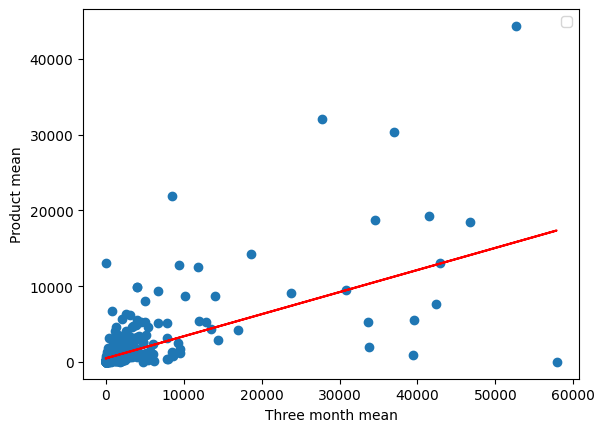

In [25]:
x = df[['three_month_mean']]
y = df[['product_mean']]

model.fit(x_train,y_train)

intercept = model.intercept_
coefficient = model.coef_[0]

#equation_label = f'Y = {intercept:.2f} + {coefficient:.2f} * X'


plt.scatter(x,y)
plt.plot(x, model.intercept_ + model.coef_ *x, color = 'red')
#plt.text(3,7,equation_label, font_size =12)

plt.xlabel('Three month mean')
plt.ylabel('Product mean')
plt.legend()
plt.show()

Mean Squared Error: 12045089.071775319
R-squared Score: 0.3911450493914156


C:\Users\uifan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


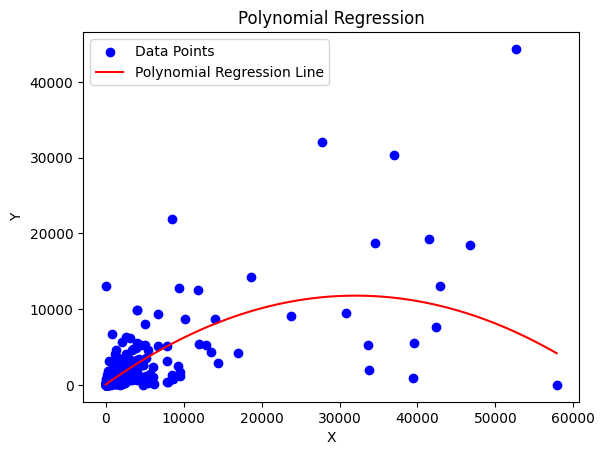

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

X = df[['three_month_mean']]
y = df[['product_mean']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

degree = 2  # degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

model = LinearRegression()

model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)


X_line = np.linspace(X.min(), X.max(), 100)
X_line_poly = poly_features.transform(X_line.reshape(-1, 1))
y_line_pred = model.predict(X_line_poly)

# Plot the data points and polynomial regression line
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_line, y_line_pred, color='red', label='Polynomial Regression Line')

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [40]:
X = df[['three_month_mean', 'three_month_median']]
y = df[['product_mean']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

plt.scatter(y_test, y_pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- three_month_median


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
new = pd.read_csv('new_tweet.csv')

In [10]:
new

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median
0,あの日見た花の名前を僕達はまだ知らない。,2011-02-23,36,16.444444,15.0,6,12.000000,9.0,NaN,NaN,NaN
1,ビッグオーダー,2016-04-15,17,34.000000,18.0,17,76.705882,18.0,NaN,NaN,NaN
2,映像研には手を出すな!,2019-12-30,7,1392.571429,1032.0,48,236.020833,128.0,6.0,633.333333,134.5
3,しぐれうい,2020-04-04,8,5259.375000,2956.0,238,4534.936975,2237.5,NaN,NaN,NaN
4,無能なナナ,2020-09-07,76,180.486842,145.0,26,678.615385,454.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
699,私に天使が舞い降りた!,2018-11-19,19,917.736842,588.0,11,363.545455,391.0,NaN,NaN,NaN
700,ヒーラーガールズ,2022-01-28,3,146.666667,162.0,1,2100.000000,2100.0,NaN,NaN,NaN
701,原神,2020-02-21,1,545.000000,545.0,9,1006.111111,527.0,NaN,NaN,NaN
702,土下座で頼んでみた,2020-09-30,2,270.000000,270.0,8,504.500000,66.0,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[284.28078822]
[0.41114258]


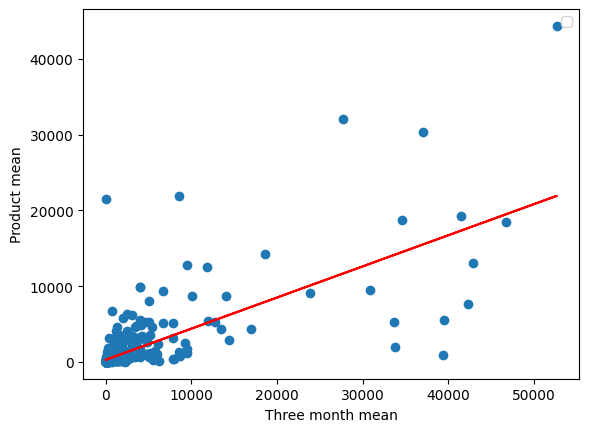

In [14]:
x = new[['three_month_mean']]
y = new[['product_mean']]
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()

model.fit(x_train,y_train)
y_pred = model.predict(x_test)


intercept = model.intercept_
coefficient = model.coef_[0]

print(intercept)
print(coefficient)

#equation_label = f'Y = {intercept:.2f} + {coefficient:.2f} * X'


plt.scatter(x,y)
plt.plot(x, model.intercept_ + model.coef_ *x, color = 'red')
#plt.text(3,7,equation_label, font_size =12)

plt.xlabel('Three month mean')
plt.ylabel('Product mean')
plt.legend()
plt.show()

In [13]:
x = new['three_month_mean']
y = new['product_mean']
print(x.corr(y))

0.7298541498740498


In [15]:
accuracy = model.score(x_test, y_test)
print(accuracy)

0.3932200214925383


In [4]:
df = pd.read_csv('categorised_favrt.csv')
df

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median,IP,event_content
0,しろくまカフェ,2012-04-12,21,275.190476,111.0,12,116.166667,19.5,NaN,NaN,NaN,しろくまカフェ,コメディ/ギャグ
1,革命機ヴァルヴレイヴ,2013-04-19,48,89.125000,67.0,132,92.424242,46.5,NaN,NaN,NaN,革命機ヴァルヴレイヴ,ドラマ/青春
2,革命機ヴァルヴレイヴ,2013-04-19,48,89.125000,67.0,132,92.424242,46.5,NaN,NaN,NaN,革命機ヴァルヴレイヴ,ドラマ/青春
3,革命機ヴァルヴレイヴ,2013-04-19,48,89.125000,67.0,132,92.424242,46.5,NaN,NaN,NaN,革命機ヴァルヴレイヴ,SF/ファンタジー
4,B-PROJECT,2015-09-20,10,434.100000,164.5,7,1278.857143,1441.0,NaN,NaN,NaN,B-PROJECT,ドラマ/青春
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,僕のヒーローアカデミア,2015-08-09,27,444.666667,404.0,279,332.806452,229.0,NaN,NaN,NaN,僕のヒーローアカデミア,ドラマ/青春
866,One Room,2017-02-17,3,121.000000,121.0,99,353.515152,267.0,NaN,NaN,NaN,One Room,恋愛/ラブコメ
867,このヒーラー、めんどくさい,2022-03-27,15,475.133333,469.0,7,703.571429,517.0,NaN,NaN,NaN,このヒーラー、めんどくさい,コメディ/ギャグ
868,陰の実力者になりたくて!,2022-03-26,1,518.000000,518.0,9,2551.111111,1524.0,NaN,NaN,NaN,陰の実力者になりたくて!,SF/ファンタジー


In [7]:
dict = {'ドラマ/青春': 'dorama/seishun', 'SF/ファンタジー':'SF/fantasy','恋愛/ラブコメ':'love','コメディ/ギャグ':'comedy', 'アクション/バトル':'action'}

df['event_content'] = df['event_content'].replace(dict)


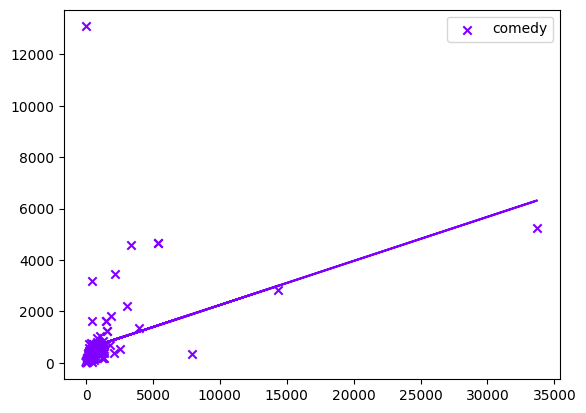

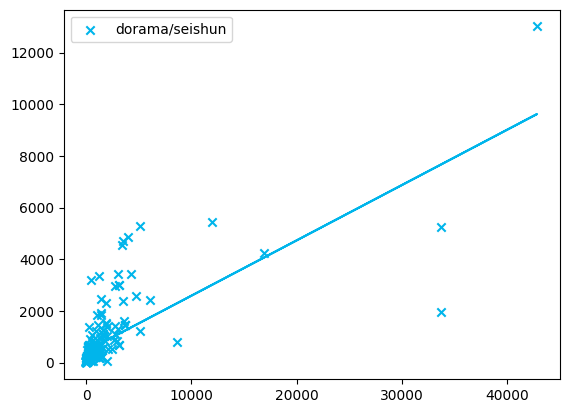

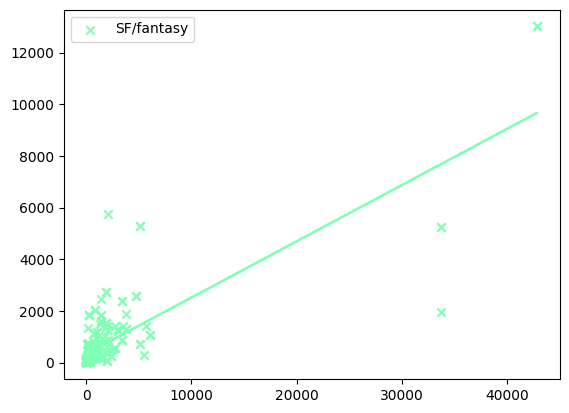

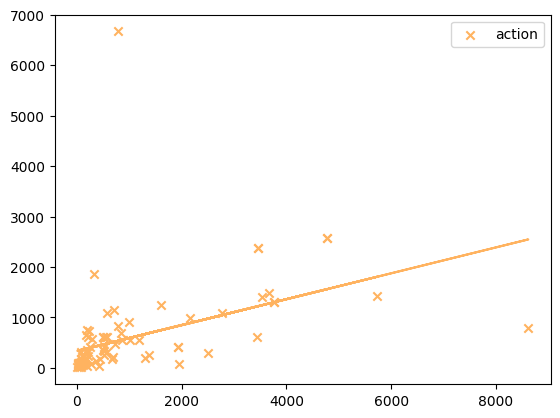

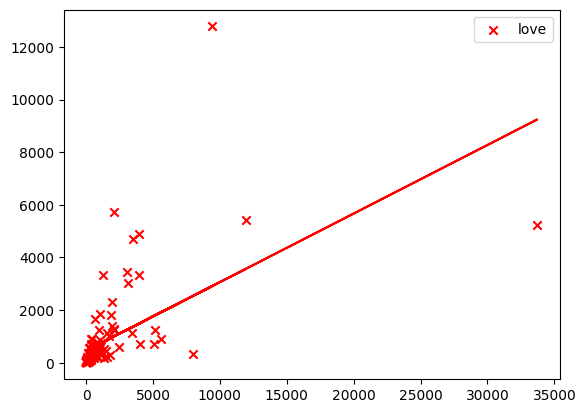

In [11]:
import matplotlib.cm as cm
import numpy as np

# Get the list of unique categories
categories = df['event_content'].unique()

# Create a colormap based on the number of categories
colors = cm.rainbow(np.linspace(0, 1, len(categories)))

# Create a dictionary mapping category to color
color_dict = {category: color for category, color in zip(categories, colors)}

for category in categories:
    subset = df[df['event_content'] == category]
    plt.scatter(subset['three_month_mean'], subset['product_mean'], label=category, color=color_dict[category], marker='x')
    
    p = np.polyfit(subset['three_month_mean'], subset['product_mean'], 1)
    # Create a function that represents the line
    f = np.poly1d(p)
    # Draw the line
    plt.plot(subset['three_month_mean'], f(subset['three_month_mean']), color=color_dict[category])

    plt.legend()
    plt.show()



In [15]:
type = pd.read_csv('type_favrt.csv')
type

,large_class_ip_name,product_date,product_count,product_mean,product_median,three_month_count,three_month_mean,three_month_median,six_month_count,six_month_mean,six_month_median,origin_flag
0,ド級編隊エグゼロス,2020-06-21,27,322.333333,284.0,39,570.692308,418.0,22.0,795.0,404.5,漫画
1,歌のお姉さんだってHしたい 〜こんな顔、TVの前のみんなには見せられないよ…,2019-04-08,26,88.692308,61.0,40,169.400000,81.5,NaN,NaN,NaN,漫画
2,東京喰種トーキョーグール,2014-04-03,24,243.666667,229.0,152,90.157895,38.0,NaN,NaN,NaN,漫画
3,僕の彼女がマジメ過ぎるしょびっちな件,2017-09-07,107,106.878505,92.0,21,211.142857,109.0,NaN,NaN,NaN,漫画
4,約束のネバーランド,2018-05-01,8,1552.000000,1362.5,30,1868.000000,1549.0,NaN,NaN,NaN,漫画
...,...,...,...,...,...,...,...,...,...,...,...,...
676,少女たちは荒野を目指す,2015-12-29,32,91.500000,69.0,11,95.181818,86.0,NaN,NaN,NaN,ゲーム
677,鉄腕アトム,2020-11-17,10,1056.800000,439.0,4,6048.500000,3152.0,NaN,NaN,NaN,漫画
678,忍たま乱太郎,2020-06-29,15,3435.000000,3310.0,12,2131.000000,2226.0,NaN,NaN,NaN,アニメ
679,おそ松くん,2015-08-26,180,4568.466667,1949.0,68,3369.470588,2539.0,NaN,NaN,NaN,漫画


In [16]:
dict = {'漫画': 'manga', 'ライトノベル':'light novel','アニメ':'anime','ゲーム':'game'}

type['origin_flag'] =type['origin_flag'].replace(dict)